<a href="https://colab.research.google.com/github/ffreirea1988/usm/blob/main/2S2024_DBSCAN_%26_HDBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Cargar librerías básicas:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
#Crear dataset ficticio (sintético o de juguete)
from sklearn.datasets import make_blobs

#Generar un dataset con parámetros específicos:
X, labels_true = make_blobs(
    n_samples=600,        #puntos o filas
    centers=4,            #4 clusters
    n_features=5,         #Cantidad de variables X que tiene mi conjunto de datos ficticios
    cluster_std=50,       #Desviación estándar de los clusters
    center_box=(0, 1000),  #Rango de las variables
    random_state=42)      #Semilla

In [32]:
#Modelos de DBSCAN y HDBSCAN trabajan con datos en formato Array (Numpy)
#Traspasar desde array a dataframe:
df = pd.DataFrame(X, columns=['X1','X2','X3','X4','X5'])
df['labels_true'] = labels_true
df.head()

,X1,X2,X3,X4,X5,labels_true
0,65.895498,85.156749,904.133904,572.289492,578.520463,1
1,35.522140,932.320300,811.124761,269.761396,187.488488,2
2,87.504371,53.669510,995.161613,560.931283,790.028418,1
3,351.572074,908.222088,773.510733,555.854293,159.596952,0
4,363.251304,954.090717,660.756533,571.439348,161.564770,0


In [33]:
#Escalar las distancias de nuestros datos (Array)
from sklearn.preprocessing import StandardScaler

#instanciar el escalado:
scaler = StandardScaler()
#asignar las variables de mi conjunto de datos para ser escaladas:
scaled = scaler.fit(X)
X_scaled = scaled.transform(X)

#Otra forma:
X_scaled = StandardScaler().fit_transform(X)


#Traspasar datos escalados a dataframe
df_scaled = pd.DataFrame(X_scaled, columns=['X1','X2','X3','X4','X5'])
df_scaled['labels_true'] = labels_true
df_scaled.head()

,X1,X2,X3,X4,X5,labels_true
0,-0.863163,-1.210983,1.162914,0.627738,1.065667,1
1,-1.085577,0.903199,0.504780,-1.164423,-0.652339,2
2,-0.704928,-1.289562,1.807027,0.560453,1.994930,1
3,1.228754,0.843059,0.238622,0.530377,-0.774880,0
4,1.314278,0.957529,-0.559229,0.622702,-0.766235,0


### Modelo DBSCAN

In [7]:
from sklearn.cluster import DBSCAN

In [34]:
#Instanciar el modelo
db = DBSCAN()

#revisar los hiperparámetros que tiene el modelo:
db.get_params().keys()

dict_keys(['algorithm', 'eps', 'leaf_size', 'metric', 'metric_params', 'min_samples', 'n_jobs', 'p'])

In [35]:
#Generar modelo DBSCAN
db = DBSCAN(eps=0.5, min_samples=20)
db = db.fit(X_scaled)

In [36]:
df_scaled['Cluster_estimado'] = db.labels_
df_scaled.head()

,X1,X2,X3,X4,X5,labels_true,Cluster_estimado
0,-0.863163,-1.210983,1.162914,0.627738,1.065667,1,-1
1,-1.085577,0.903199,0.504780,-1.164423,-0.652339,2,0
2,-0.704928,-1.289562,1.807027,0.560453,1.994930,1,-1
3,1.228754,0.843059,0.238622,0.530377,-0.774880,0,1
4,1.314278,0.957529,-0.559229,0.622702,-0.766235,0,1


In [37]:
print(set(db.labels_))
print(len(set(db.labels_)))

{0, 1, 2, 3, -1}
5


In [38]:
num_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
print("Cantidad de clusters: ",num_clusters)
ruido = list(db.labels_).count(-1)
print("Cantidad de filas que no pertenecen a ningun cluster: ",ruido)

Cantidad de clusters:  4
Cantidad de filas que no pertenecen a ningun cluster:  70


In [52]:
#Crear una función que permite visualizar de manera gráfica los clusters:

def plot_clusters(X, labels, es_nucleo=None, title='Clusters'):
    # Variables de la función:
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    # Recorrer puntos del set de datos para identificar Núcleos, Bordes y Ruido
    for k, color in zip(unique_labels, colors):
        # Ruido
        if k == -1:
            color = (0, 0, 0)  # Negro para el ruido (RGB)

            # Puntos de ruido (marcador en forma de cruz)
            punto_ruido = X[labels == -1]
            plt.plot(
                punto_ruido[:, 0],
                punto_ruido[:, 1],
                'x',                  # Cruz
                markerfacecolor=tuple(color),
                markeredgecolor='k',
                markersize=5          # Tamaño más pequeño
            )
            continue  # Pasar al siguiente cluster

        # Identificar puntos que pertenecen al cluster actual
        es_componente = (labels == k)

        # Inicialización de es_nucleo si es None
        if es_nucleo is None:
            es_nucleo = np.ones_like(labels, dtype=bool)

        # Graficar núcleos
        punto_nucleo = X[es_componente & es_nucleo]
        plt.plot(
            punto_nucleo[:, 0],
            punto_nucleo[:, 1],
            'o',                    # Círculo
            markerfacecolor=tuple(color),
            markeredgecolor='k',
            markersize=6            # Tamaño estándar para núcleos
        )

        # Graficar puntos de borde
        punto_borde = X[es_componente & ~es_nucleo]
        plt.plot(
            punto_borde[:, 0],
            punto_borde[:, 1],
            'o',                    # Círculo
            markerfacecolor=tuple(color),
            markeredgecolor='k',
            markersize=4            # Tamaño menor para bordes
        )

    plt.title(title)
    plt.show()

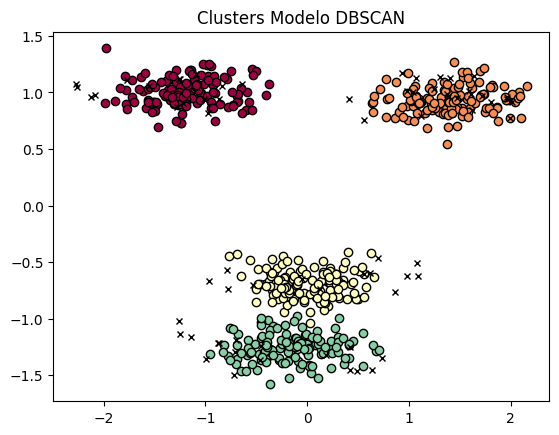

In [53]:
plot_clusters(X=X_scaled, labels=db.labels_, es_nucleo=None, title='Clusters Modelo DBSCAN')

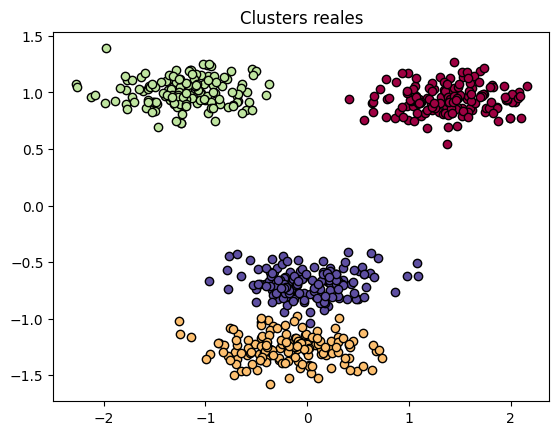

In [54]:
plot_clusters(X=X_scaled, labels=labels_true, es_nucleo=None, title="Clusters reales")

### Modelo HDBSCAN

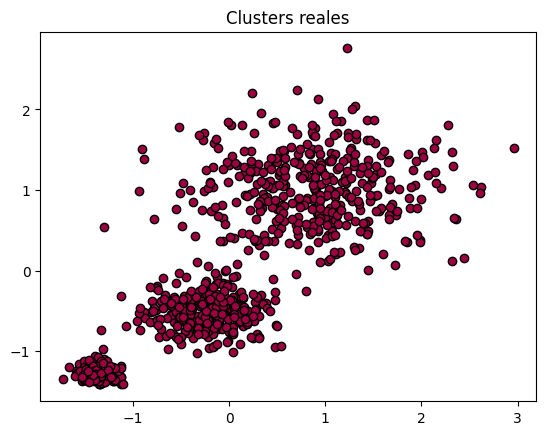

In [69]:
# Generar datos con diferentes densidades
X1, label1 = make_blobs(n_samples=200, centers=[(0, 5)], cluster_std=0.5, random_state=42)   # Cluster denso
X2, label2 = make_blobs(n_samples=300, centers=[(5, 10)], cluster_std=1.5, random_state=42)   # Cluster mediano
X3, label3 = make_blobs(n_samples=400, centers=[(10, 20)], cluster_std=3.0, random_state=42)  # Cluster disperso

# Combinar los clusters
X = np.vstack((X1, X2, X3))

# Agrupar los labels
labels = np.concatenate([label1, label2, label3])

# Escalar los datos
X_scaled = StandardScaler().fit_transform(X)

plot_clusters(X=X_scaled, labels=labels, es_nucleo=None, title="Clusters reales")

In [21]:
pip install hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 30.4 MB/s eta 0:00:00


In [56]:
# importamos la librería HDBSCAN
from hdbscan import HDBSCAN

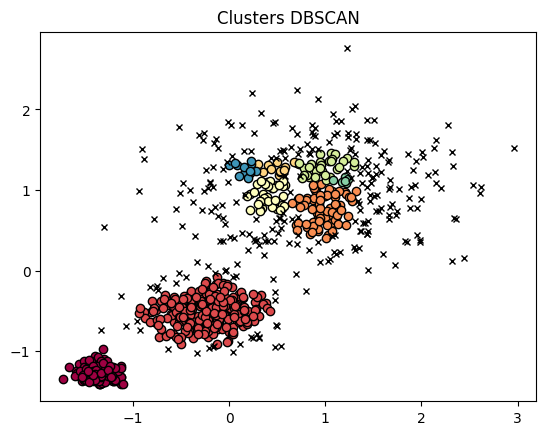

In [81]:
# Creamos una agrupación de clsuters basado en el modelo DBSCAN para este nuevo conjunto de datos
db2 = DBSCAN(eps=0.7, min_samples=10).fit(X)
plot_clusters(X=X_scaled, labels=db2.labels_, es_nucleo=None, title="Clusters DBSCAN")

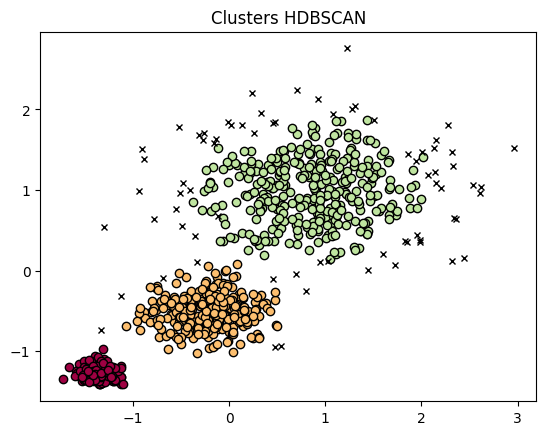

In [91]:
# Crear y entrenar el modelo HDBSCAN
hdb = HDBSCAN(min_cluster_size=10).fit(X)
plot_clusters(X=X_scaled, labels=hdb.labels_, es_nucleo=None, title="Clusters HDBSCAN")